# Комп'ютерний практикум №1.
Виконали студенти групи ФІ-94 Маринін Іван Павло Ігорович та Немкович Ольга Михайлівна (варіант №4).

1. Мета роботи:
    дослiдити особливості атаки подвiйних витрат.

2. Постановка задачі:
    Розробити програмну реалiзацiю, яка дозволить провести вiдповiднi обчислення:

    Завдання 1. Обчислити порiг стiйкостi pst (мiнiмальну частку зловмисних майнерiв, яка гарантує, що
    ймовiрнiсть атаки подвiйної витрати буде дорiвнювати 1) для заданих значень iнтенсивностi
    створення блокiв чесними майнерами \alpha H та зловмисними майнерами \alpha M.

    Завдання 2. Для заданих значень iнтенсивностi створення блокiв чесними майнерами \alpha H та
    зловмисними майнерами \alpha M, а також заданого часу синхронiзацiї DH, обчислити
    залежнiсть ймовiрностi, що гiлка, створена зловмисниками, стане довшою за гiлку чесних
    майнерiв, якщо в момент розгалуження гiлка чесних майнерiв була довшою на n блокiв,
    вiд значення n. Побудувати вiдповiдну таблицю розрахункiв та графiк залежностi
    ймовiрностi в залежностi вiд значення n.

    Завдання 3. Розрахувати мiнiмальну кiлькiсть блокiв пiдтвердження, якi гарантують, що iмовiрнiсть
    успiшної атаки подвiйної витрати буде не бiльшою нiж 10^(-3).
    Для заданого фiксованого значення iнтенсивностi створення блокiв \alpha необхiдно написати
    програму, яка обчислить значення мiнiмальної кiлькостi блокiв пiдтвердження, що
    гарантують ймовiрнiснiсть успiшної атаки подвiйної витрати на рiвнi не бiльше нiж 10^(-3).
    При цьому розрахунки необхiдно провести в залежностi вiд часу синхронiзацiї DH (яке
    приймає значення з вiдрiзка [0; 180]) для рiзних значень хешрейту зловмисника:
    для pM = 0.15, pM = 0.25 i pM = 0.4. Для кожного з трьох значень хешрейту
    зловмисника побудувати вiдповiдну таблицю розрахункiв та графiк залежностi
    мiнiмальної кiлькостi блокiв пiдтвердження в залежностi вiд часу синхронiзацiї.
    Навести теоретичний опис проведених обчислень з вiдповiдним обґрунтуванням.

3. Хiд виконання роботи, опис труднощiв:
    завдання комп'ютерного практикуму виконувалися по порядку. Значних труднощів при розробці не виникало,
    адже варто було лише зрозуміти, що саме вимагається і запрограмувати відповідну уже готову формулу.
    Проте, формули були доволі об'ємні та складні, тому довелося бути гранично уважним задля того, щоб не
    допустити механічну помилку.
    Усі завдання були виконані успішно, окрім одного підпункту 3 завдання, а саме, розрахунок необхідної
    кількості блоків підтвердження при хеш-рейті зловмисника рівному 0.4. Детальніше описано нижче.

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special

In [ ]:
alfa_h = 0.0009
alfa_m = 0.0004
d_h = 40

Завдання №1.
    Згідно Теореми 1 із джерела(роботи) №1, наданого в якості теоретичного посібника для практикуму,
    порiг стiйкостi p можна знайти із наступної рівності: 1 - p = e^(hamma * p) / 2.
    Роз'язок даного рівняння було знайдено за допомогою методу половинного ділення.
    Результат - 0.48717173220277243.

In [ ]:
def treshold():
    hamma = alfa_h + alfa_m
    a = 0
    b = 1
    i = 0
    p = 0.5
    while 1 - p != math.exp(d_h * hamma * p) / 2:
        if (math.exp(d_h * hamma * p) / 2 + p - 1) * (math.exp(d_h * hamma * a) / 2 + a - 1) < 0:
            b = p
        else:
            a = p
        p = (a + b) / 2
        i += 1
    return p

In [ ]:
print(treshold())

0.48717173220277243


Завдання №2.
    Згідно Леми 5.3 із джерела(роботи) №2, наданого в якості теоретичного посібника для практикуму,
    імовiрность, що гiлка, створена зловмисниками, стане довшою за гiлку чесних майнерiв, якщо в
    момент розгалуження гiлка чесних майнерiв була довшою на n блокiв, рівна:
    1, якщо p'_M > p'_H
    (p'_M / p'_H) ^ n, в іншому випадку
    
    Бачимо, що чим більше блоків різниці між чесними та зловмисниками, то меншою стає ймовірність
    того, що другі переженуть перших, до того ж спадає згідно експоненційної швидкості. Наприклад,
    для n = 3, p = 0.102, а для n = 6, p = 0.010 та n = 9, p = 0.001.
    
    Ми побудували таблицю та графік для n від 1 до 10. Більші n ми не бачили сенсу брати, оскільки
    різниця із попередніми була би мізерною, а основна суть видна уже за наявної кількості блоків.

In [ ]:
p_h = alfa_h / (alfa_h + alfa_m)
p_m = alfa_m / (alfa_h + alfa_m)

p_h_stroke = math.exp(-alfa_m * d_h) * p_h
p_m_stroke = 1 - math.exp(-alfa_m * d_h) * p_h

    n       q_n
0   1  0.467741
1   2  0.218782
2   3  0.102333
3   4  0.047866
4   5  0.022389
5   6  0.010472
6   7  0.004898
7   8  0.002291
8   9  0.001072
9  10  0.000501


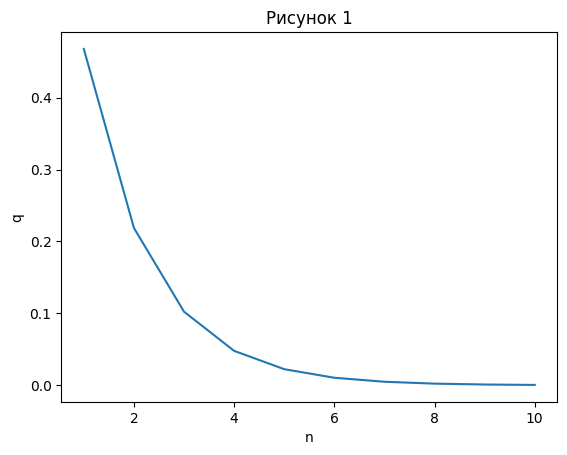

In [ ]:
def overtake_prob(n):
    if p_m_stroke > p_h_stroke:
        q_n = 1
    else:
        q_n = (p_m_stroke / p_h_stroke) ** n
    return q_n

q_n_list = []
n_list = [i for i in range(1, 11)]

for i in range(1, 11):
    q_n_list.append(overtake_prob(i))


d = {'n' : n_list, 'q_n' : q_n_list}
df = pd.DataFrame(data=d)

print(df)
plt.plot(n_list, q_n_list)
plt.title("Рисунок 1")
plt.xlabel("n")
plt.ylabel("q")
plt.show()

Завдання №3.
    Згідно Теореми 5.4 із джерела(роботи) №2, наданого в якості теоретичного посібника для практикуму,
    iмовiрнiсть успiшної атаки подвiйної витрати в залежності від кількості блоків підтвердження
    визначається наступним чином:
    1, якщо p'_M > p'_H
    1 - SUMM(P_z(k) * (1 - (p'_M / p'_H) ^ (z - k))), в іншому випадку,
    де z - кількість блоків підтвердження; k є [0, z], k є N; P_z(k) визначається згідно формули №17
    із того ж самого джерела.
    
    Необхідно було знайти кількість блоків підтвердження в залежності від різного хеш-рейту зловмисника
    при сталій загальній швидкості створення блоків, щоб ймовірність успіху була не більшою, ніж 0.001.
    Рисунки 2-4 відповідають хеш-рейтам зловмисника 0.15, 0,25 та 0,4 відповідно та візуалізують
    ймовірність атаки подвійної витрати в залежності від кількості блоків підтвердження.
    Для хеш-рейтів зловмисника 0.15 та 0,25 вдалося успішно знайти необхідну кількість - 9 та 21 відповідно.
    Проте, для хеш-рейту 0.4 алгоритм зупинив свою роботу на 85 блоці підтвердження
    з ймовірністю 0.01495404766972086 через оперування із занадто великими числами - наприклад,
    число один із коефіцієнтів при пошуку P_z(k) рівний 1.920765817226769e+21. Передбачити скільки блоків
    насправді необхідно, щоб досягнути бажаного резльутату, за даних умов доволі складно, проте ми
    вважаємо, що їх має бути не менше декількох сотень.

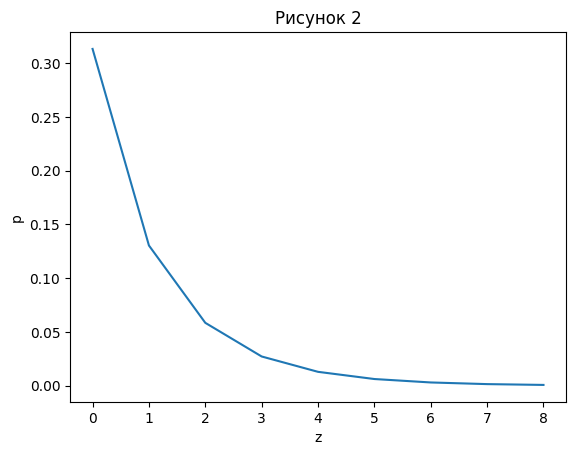

Кількість блоків підтвердження: 9
Ймовірність атаки подвійної витрати: 0.0007311569731017764


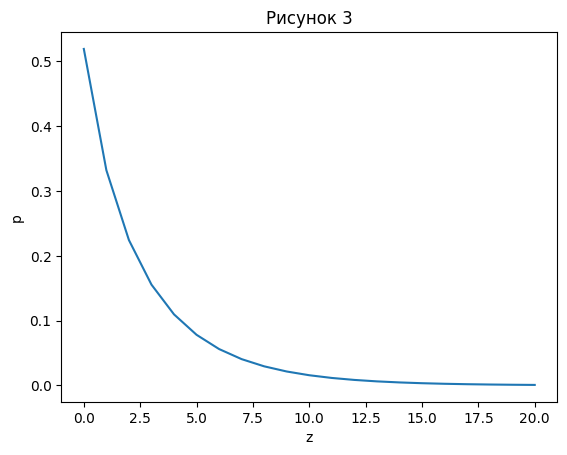

Кількість блоків підтвердження: 21
Ймовірність атаки подвійної витрати: 0.0007682765380500056


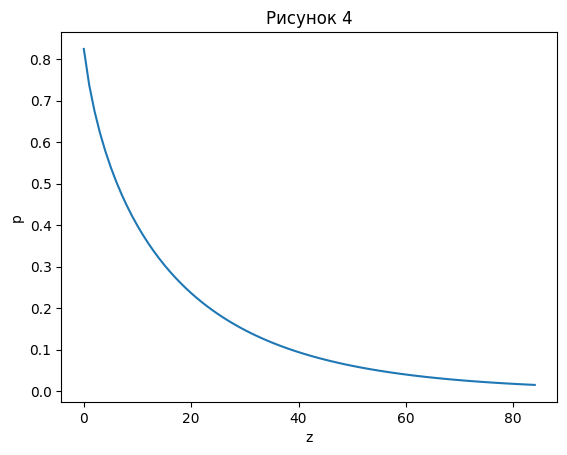

Кількість блоків підтвердження: 85
Ймовірність атаки подвійної витрати: 0.01495404766972086


In [ ]:
alfa = 0.0013
p_m_list = [0.15, 0.25, 0.4]
p_h_list = [1 - i for i in p_m_list]

alfa_m_list = [alfa * i for i in p_m_list]
alfa_h_list = [alfa * i for i in p_h_list]

p_h_stroke_list = []
p_m_stroke_list = []
for i in range(3):
    p_h_stroke_list.append(math.exp(-alfa_m_list[i] * d_h) * p_h_list[i])
    p_m_stroke_list.append(1 - math.exp(-alfa_m_list[i] * d_h) * p_h_list[i])


def p_z_k_search(z, k, i):
    var1 = (p_h_list[i] ** z) / (math.factorial(z - 1))
    var2 = (math.exp(-alfa_m_list[i] * z * d_h) * ((alfa_m_list[i] * z * d_h) ** k)) / math.factorial(k)
    var3 = 0
    for j in range(k + 1):
        var3 += (math.factorial(z+j-1)*scipy.special.comb(k, j)) / ((alfa*z*d_h)**j)
    return var1 * var2 * var3

z_list = []
p_z_list = []
for i in range(3):
    p_z = 1
    z = 1
    while p_z >= 0.001:
        k = 0
        summ = 0
        while k <= z:
            summ += p_z_k_search(z, k, i) * (1 - ((p_m_stroke_list[i] / p_h_stroke_list[i]) ** (z - k)))
            k += 1
        p_z = 1 - summ
        z_list.append(z-1)
        p_z_list.append(p_z)
        z += 1
        if z == 86:
            break
    plt.plot(z_list, p_z_list)
    if i == 0:
        plt.title("Рисунок 2")
    if i == 1:
        plt.title("Рисунок 3")
    if i == 2:
        plt.title("Рисунок 4")
    plt.xlabel("z")
    plt.ylabel("p")
    plt.show()
    print('Кількість блоків підтвердження:', z - 1)
    print('Ймовірність атаки подвійної витрати:', p_z_list[-1])
    z_list.clear()
    p_z_list.clear()

Висновки:
    у даному копм'ютерному практикумі досліджено особливості атаки подвiйних витрат та пов'язані
    характеристики 'взаємодії' чесних майнерів із зловмисниками. За допомогою методичних вказівок та
    власноруч написаного програмного забезпечення визначено: 1) поріг стійкості для атаки подвійної
    витрати; 2) значення ймовірності 'обгону' зловмисниками чесних майнерів; 3) мінімальну кількість
    блоків підтвердження задля фіксованого максимального значення ймовірності атаки подвiйних витрат.
    Було визначено, що у випадку фіксованих значень інтесивності створення блоків майнерами відповідно
    наданого варіанту поріг стійкості рівний 0.48717173220277243; а ймовірність 'обгону' зловмисниками
    чесних майнерів та ймовірність атаки подвійної витрати експоненційно спадає зі збільшенням кількості
    блоків, що становлять різницю у відстані та підтвердження відповідно.